In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

churn_df = pd.read_csv('data/churn.all')

In [4]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
print "Num of rows: " + str(churn_df.shape[0]) # row count
print "Num of columns: " + str(churn_df.shape[1]) # col count

Num of rows: 5000
Num of columns: 21


In [6]:
# Remove extra whitespaces
churn_df['voice_mail_plan'][0]

' yes'

In [7]:
churn_df['voice_mail_plan'] = churn_df['voice_mail_plan'].map(lambda x: x.strip())
churn_df['intl_plan'] = churn_df['intl_plan'].map(lambda x: x.strip())
churn_df['churned'] = churn_df['churned'].map(lambda x: x.strip())

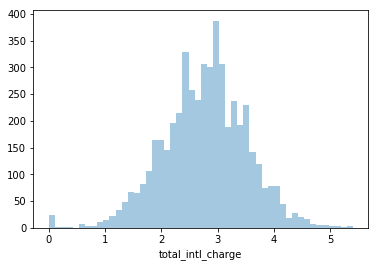

In [8]:
# Explore the distribution of the variable
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.distplot(churn_df['total_intl_charge'], kde=False)

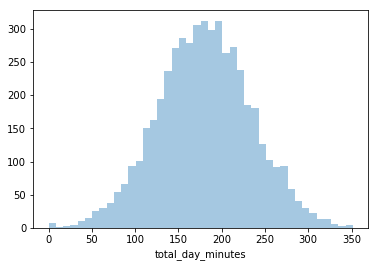

In [9]:
sb.distplot(churn_df['total_day_minutes'], kde=False)

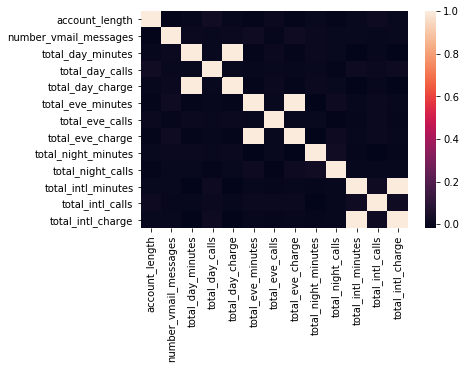

In [10]:
corr = churn_df[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]].corr()

sb.heatmap(corr)

In [11]:
corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,total_intl_charge
account_length,1.000000,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.001291,0.014277,0.001292
number_vmail_messages,-0.014575,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.002463,0.000124,0.002505
total_day_minutes,-0.001017,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,-0.019486,-0.001303,-0.019415
total_day_calls,0.028240,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.013097,0.010893,0.013161
total_day_charge,-0.001019,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,-0.019490,-0.001307,-0.019419
total_eve_minutes,-0.009591,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,0.000137,0.008388,0.000159
total_eve_calls,0.009143,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,-0.007458,0.005574,-0.007507
total_eve_charge,-0.009587,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,0.000132,0.008393,0.000155
total_night_minutes,0.000668,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,-0.006721,-0.017214,-0.006655
total_night_calls,-0.007825,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013422,0.026972,1.000000,0.000391,-0.000156,0.000368


In [12]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [13]:
# Get ground truth data
y = np.where(churn_df['churned'] == 'True.',1,0)

# Drop some useless columns
to_drop = ['state','area_code','phone_number','churned']
churn_feat_space = churn_df.drop(to_drop, axis=1)

# yes and no have to be converted to boolean values
yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

# Converts data frame to its Numpy-array representation.
X = churn_feat_space.as_matrix().astype(np.float)

In [14]:
churn_feat_space.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [15]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print "Feature space holds %d observations and %d features" % X.shape
print "Unique target labels:", np.unique(y)

Feature space holds 5000 observations and 17 features
Unique target labels: [0 1]


In [16]:
print X

[[ 0.69894149 -0.32324017  1.66712012 ..., -0.58423577 -0.0955088
  -0.43667564]
 [ 0.16984882 -0.32324017  1.66712012 ..., -0.58423577  1.24598231
  -0.43667564]
 [ 0.92569549 -0.32324017 -0.5998368  ...,  0.22991664  0.69597096
  -1.20223603]
 ..., 
 [-0.98911606 -0.32324017 -0.5998368  ..., -0.17715957  1.20573758
  -0.43667564]
 [ 0.2202386  -0.32324017 -0.5998368  ...,  0.63699285 -0.63210525
  -1.20223603]
 [-0.35924384 -0.32324017  1.66712012 ...,  4.70775494 -0.35039211
  -1.20223603]]


In [17]:
from sklearn.cross_validation import KFold

#This program does 5-fold. It saves the result at each time as different parts of y_pred. 
#In the end, it returns the y_pred as the result of all the five 5-fold.
def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

/Users/rui/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
from sklearn.linear_model import LogisticRegression

def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred) # NumPy interpretes True and False as 1. and 0.

LR_CV_result = run_cv(X,y,LogisticRegression)
print "Logistic Regression (L2 is default): " + str(accuracy(y, LR_CV_result))

Logistic Regression (L2 is default): 0.8664


In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_CV_result = run_cv(X,y,LinearDiscriminantAnalysis)
print "Linear Discrinimant Analysis: " + str(accuracy(y, LDA_CV_result))

Linear Discrinimant Analysis: 0.8554


In [20]:
from sklearn.qda import QDA
QDA_CV_result = run_cv(X,y,QDA)
print "Linear Discrinimant Analysis: " + str(accuracy(y, LDA_CV_result))
print "Quadratic Discrinimant Analysis: " + str(accuracy(y, QDA_CV_result))
print "Logistic Regression (L2 is default): " + str(accuracy(y, LR_CV_result))

Linear Discrinimant Analysis: 0.8554
Quadratic Discrinimant Analysis: 0.8734
Logistic Regression (L2 is default): 0.8664


/Users/rui/anaconda/lib/python2.7/site-packages/sklearn/qda.py:6: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [21]:
#Show the details of prediction results
churn_df_LDA_CV = churn_df
churn_df_LDA_CV['LDA_Predicted_churned'] = LDA_CV_result == 1
churn_df_LDA_CV[churn_df_LDA_CV.columns[-2:]].head(10)

,churned,LDA_Predicted_churned
0,False.,False
1,False.,False
2,False.,False
3,False.,True
4,False.,True
5,False.,False
6,False.,False
7,False.,False
8,False.,False
9,False.,True


In [22]:
#Show the details of prediction results
churn_df_QDA_CV = churn_df
churn_df_QDA_CV['QDA_Predicted_churned'] = QDA_CV_result == 1
churn_df_QDA_CV[churn_df_QDA_CV.columns[-3:]].head(10)

,churned,LDA_Predicted_churned,QDA_Predicted_churned
0,False.,False,False
1,False.,False,False
2,False.,False,False
3,False.,True,True
4,False.,True,True
5,False.,False,True
6,False.,False,False
7,False.,False,True
8,False.,False,False
9,False.,True,True


In [23]:
#Show the details of prediction results
churn_df_LR_CV = churn_df
churn_df_LR_CV['LR_Predicted_churned'] = LR_CV_result == 1
churn_df_LR_CV[churn_df_LR_CV.columns[-4:]].head(10)

,churned,LDA_Predicted_churned,QDA_Predicted_churned,LR_Predicted_churned
0,False.,False,False,False
1,False.,False,False,False
2,False.,False,False,False
3,False.,True,True,True
4,False.,True,True,True
5,False.,False,True,False
6,False.,False,False,False
7,False.,False,True,False
8,False.,False,False,False
9,False.,True,True,False


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    sensitivity = tp / (tp + fn + 0.0)
    specificity = tn / (fp + tn + 0.0)
    print classifier
    print "Accuracy is " + str(accuracy)
    print "Sensitivity is " + str(sensitivity)
    print "Specificity is " + str(specificity)

def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
    ("LDA", confusion_matrix(y,LDA_CV_result)),("QDA", confusion_matrix(y,QDA_CV_result)),
    ("Logisitic Regression", confusion_matrix(y,LR_CV_result))
]

LDA
Accuracy is 0.8554
Sensitivity is 0.884532529082
Specificity is 0.477653631285


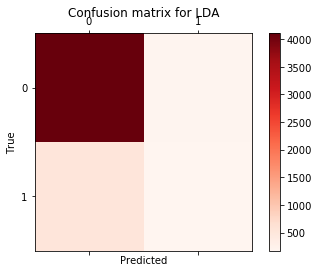

QDA
Accuracy is 0.8734
Sensitivity is 0.923807318203
Specificity is 0.554252199413


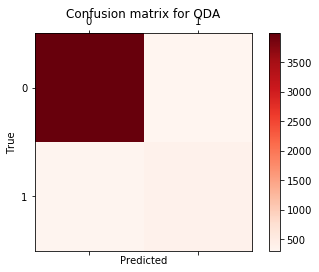

Logisitic Regression
Accuracy is 0.8664
Sensitivity is 0.881820096903
Specificity is 0.577075098814


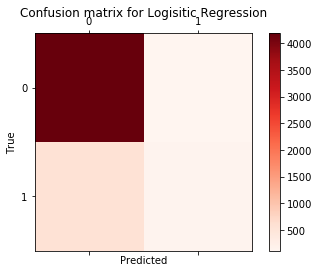

In [25]:
%matplotlib inline
draw_confusion_matrices(confusion_matrices,class_names)

[ 0.12181386  0.24065734  0.35785948  0.47354521  0.58624656  0.64805417
  0.7081957   0.76690725  0.82530526  0.88318475  0.94059227  0.99733184
  0.99999951  0.99999994  0.99999998  1.          1.        ]


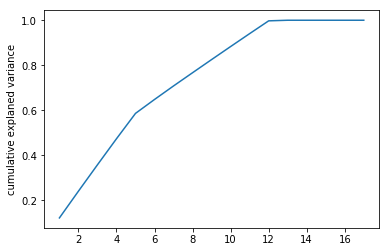

In [26]:
#PCA

import numpy as np
from sklearn.decomposition import PCA
my_model = PCA(n_components=17)
my_model.fit_transform(X)

print(my_model.explained_variance_ratio_.cumsum())
gg=my_model.explained_variance_ratio_.cumsum()

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],gg)
plt.ylabel('cumulative explaned variance')
plt.show()
k=12 # Explain about 99% variances

pca = PCA(n_components=9)
pca.fit(churn_feat_space)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
a=pca.transform(churn_feat_space)

X2 = a.astype(np.float)

In [30]:
print X2[0:1]

[[-89.36922715  20.99728877  30.68877987  27.94362612   9.75070254
   -7.91796035   4.63806988  17.22982337   0.27238332]]


In [84]:
LDA_CV_result2 = run_cv(X2,y,LinearDiscriminantAnalysis)
QDA_CV_result2 = run_cv(X2,y,QDA)
LR_CV_result2 = run_cv(X2,y,LogisticRegression)
print "Linear Discrinimant Analysis: " + str(accuracy(y, LDA_CV_result2))
print "Quadratic Discrinimant Analysis: " + str(accuracy(y, QDA_CV_result2))
print "Logistic Regression (L2 is default): " + str(accuracy(y, LR_CV_result2))

Linear Discrinimant Analysis: 0.8642
Quadratic Discrinimant Analysis: 0.8894
Logistic Regression (L2 is default): 0.8656


In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    sensitivity = tp / (tp + fn + 0.0)
    specificity = tn / (fp + tn + 0.0)
    print classifier
    print("Accuracy is " + str(accuracy))
    print("Sensitivity is " + str(sensitivity))
    print("Specificity is " + str(specificity))
    
def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
    ("LDA", confusion_matrix(y,LDA_CV_result2)),("QDA", confusion_matrix(y,QDA_CV_result2)),
    ("Logisitic Regression", confusion_matrix(y,LR_CV_result2))
]

In [89]:
# Print the details of the resutls
churn_df_LR_CV = churn_df
churn_df_LDA_CV['LDA_Predicted_churned'] = LDA_CV_result2 == 1

churn_df_QDA_CV['QDA_Predicted_churned'] = QDA_CV_result2 == 1

churn_df_LR_CV['LR_Predicted_churned'] = LR_CV_result2 == 1
churn_df_LR_CV[churn_df_LR_CV.columns[-4:]].head(10)

,churned,LDA_Predicted_churned,QDA_Predicted_churned,LR_Predicted_churned
0,False.,False,False,False
1,False.,False,False,False
2,False.,False,False,False
3,False.,False,False,False
4,False.,False,False,False
5,False.,False,False,False
6,False.,False,False,False
7,False.,False,False,False
8,False.,False,False,False
9,False.,False,False,False


LDA
Accuracy is 0.8642
Sensitivity is 0.863435237329
Specificity is 1.0


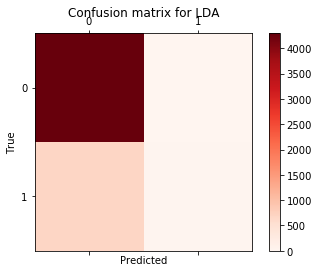

QDA
Accuracy is 0.8894
Sensitivity is 0.888127853881
Specificity is 0.923076923077


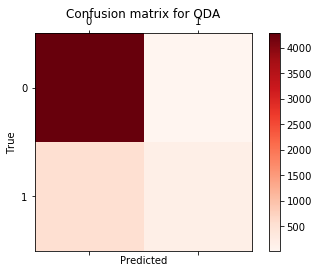

Logisitic Regression
Accuracy is 0.8656
Sensitivity is 0.864652567976
Specificity is 1.0


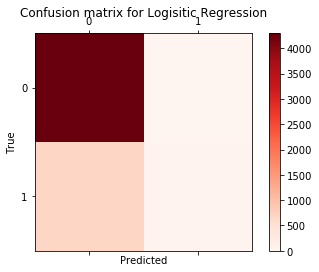

In [90]:
%matplotlib inline
draw_confusion_matrices(confusion_matrices,class_names)